In [2]:
import numpy as np
import torch
import torchvision
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import json

In [3]:
print("Pytorch version ", torch.__version__)
print("Torchvision version ", torchvision.__version__)

Pytorch version  1.7.0
Torchvision version  0.8.1


In [4]:
use_pretrained = True
net = models.vgg16(pretrained=use_pretrained)
net.eval()
print(net)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [5]:
class BaseTransform():
    def __init__(self, resize, mean, std):
        self.base_transform = transforms.Compose([
            transforms.Resize(resize),
            transforms.CenterCrop(resize),
            transforms.ToTensor(),
            transforms.Normalize(mean, std)
        ])
    def __call__(self, img):
        return self.base_transform(img)

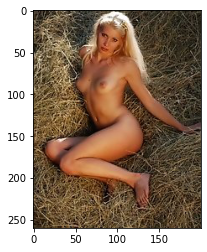

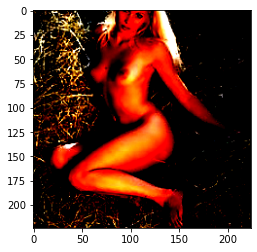

In [6]:
image_file_path = "../data/train/nude/This-Astonishing-Nude-Angel-Decided-To-Loll-About-Just-On-The-Fresh-Hayloft-And-To-Tease-Her-Marvelo.jpg"
img = Image.open(image_file_path)

plt.imshow(img)
plt.show()

resize = 224
mean = (0.485, 0.456, 0.406) 
std = (0.229, 0.224, 0.225)

transform = BaseTransform(resize, mean, std) # Tạo ra transform
img_transformed = transform(img) #transform ảnh input

#(chanels, height, width) -> (height, width, channels) 
#clip (0,1)
img_transformed = img_transformed.numpy().transpose(1,2,0)
img_transformed = np.clip(img_transformed, 0, 1)

plt.imshow(img_transformed)
plt.show()

In [7]:
class Predictor():
    def __init__(self, class_index):
        self.class_index = class_index
    
    def predict_max(self, out):
        maxid = np.argmax(out.detach().numpy())
        predicted_label_name = self.class_index[str(maxid)]
        
        return predicted_label_name

class_index = json.load(open('./imagenet_class_index.json', 'r'))
predictor = Predictor(class_index)

In [8]:
img_file_path = '../data/train/nude/This-Astonishing-Nude-Angel-Decided-To-Loll-About-Just-On-The-Fresh-Hayloft-And-To-Tease-Her-Marvelo.jpg'
img = Image.open(image_file_path)

resize = 224
mean = (0.485, 0.456, 0.406) 
std = (0.229, 0.224, 0.225)
transform = BaseTransform(resize, mean, std)
img_transformed = transform(img)
img_transformed = img_transformed.unsqueeze_(0)

out = net(img_transformed)
result = predictor.predict_max(out)
print("Result is:", out)

Result is: tensor([[ 1.2730e+00, -3.6777e+00, -3.1673e+00, -3.3242e+00, -1.1596e+00,
         -1.3231e+00,  3.0692e-01, -2.3925e-01,  4.4454e-01, -6.1861e-02,
         -1.3304e+00, -3.2033e+00, -2.1915e+00, -1.6677e-02, -8.4337e-01,
         -3.3936e-01, -3.4567e+00, -2.7303e+00, -2.0463e+00, -4.7652e-01,
         -3.2653e+00, -2.6198e+00, -3.0998e+00, -2.7169e+00, -1.4273e+00,
         -2.2104e+00,  1.8477e-01,  1.6007e-01, -9.7012e-01, -1.5985e+00,
          7.3948e-01, -2.5162e+00,  1.1032e+00,  5.9489e-01,  5.4756e-01,
          8.1957e-01,  1.5308e+00,  2.3063e+00,  6.8597e-02,  1.3578e+00,
         -1.3995e+00,  2.5712e+00,  6.2353e-01,  2.2236e+00,  1.7919e+00,
          2.1231e+00,  5.4360e-01,  7.0462e-01,  5.6525e-01, -3.0413e-01,
          2.9865e-01,  1.4062e+00,  3.0722e+00,  6.9715e-01,  2.8245e+00,
          4.3161e-01, -5.9863e-01,  6.0797e-02, -2.0108e+00,  2.0684e+00,
          6.6853e-01,  2.3480e+00,  2.8296e+00,  1.7979e+00,  1.1917e+00,
         -1.7394e+00, -7.71